# Base imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
import jinja2


In [3]:
big_daddy = pd.read_csv("X_train_Hi5.csv", dtype = object)

In [4]:
big_daddy.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.0,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.0,07004X0046/D6-20,...,5.698946813070766,45.72510615266517,1454.0,1793055303.0,11.8,992,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.6,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,5.464932552162862,46.21073434398066,1051.0,1085124529.0,0.6,1786,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,5.085060232188761,45.81282810297125,69266.0,381049179.0,0,8085,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.2,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,5.80284142164585,46.36604880801198,39286.0,380091107.0,1.5,2838,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.3,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.0,06518X0026/P2,...,5.377264685535519,46.08098929540223,1273.0,19666309.0,0.2,1352,26180,21.5,9.8,Very Low


In [5]:
big_daddy.describe()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
count,2830316,2830316,2830316,2651254,2830316,2830316,2600464,2688970,2830316,2830316,...,2274386,2274386,2274386,2451155,2803496,2803496,2803496,2803496,2803496,2830316
unique,2830316,94,476,1038,94,2293,2550,854,1606,2851,...,1600,1600,1495,7215,367,1699,925,510,408,5
top,0,33,Fri Jun 28 07:31:38 CEST 2024,10.0,Gironde,49328,Château d'eau,['221AA17'],107.0,07004X0019/S3,...,-0.7737863820414413,44.88622288115974,33449.0,0.0,0,26215,N/A - résultat non disponible,0,0,Average
freq,1,170161,2042184,41623,170161,14079,5624,52594,17919,1369,...,32373,32373,32373,177012,438008,14079,56347,682314,356446,649464


# Splitting

In [6]:
sub_dataframes = defaultdict(list)
for col in big_daddy.columns:
    prefix = col.split('_')[0]  # Extract the prefix (e.g., 'sales', 'profit', etc.)
    sub_dataframes[prefix].append(col)

In [7]:
sub_dfs = {prefix: big_daddy[columns] for prefix, columns in sub_dataframes.items()}

for prefix, sub_df in sub_dfs.items():
    print(f"Sub-DataFrame for prefix '{prefix}':\n{sub_df}\n")



Sub-DataFrame for prefix 'row':
        row_index
0               0
1               1
2               2
3               3
4               4
...           ...
2830311   3294080
2830312   3294081
2830313   3294082
2830314   3294083
2830315   3294084

[2830316 rows x 1 columns]

Sub-DataFrame for prefix 'piezo':
        piezo_station_department_code      piezo_station_update_date  \
0                                  01  Sun Jul 14 13:00:02 CEST 2024   
1                                  01  Sun Jul 14 13:00:02 CEST 2024   
2                                  01  Sun Jul 14 13:00:02 CEST 2024   
3                                  01  Sun Jul 14 13:00:02 CEST 2024   
4                                  01  Sun Jul 14 13:00:02 CEST 2024   
...                               ...                            ...   
2830311                            95  Thu Sep 19 11:45:47 CEST 2024   
2830312                            95  Thu Sep 19 14:41:55 CEST 2024   
2830313                            95  Th

In [8]:
hydro=sub_dfs['hydro']

In [9]:
hydro.head()

,hydro_station_code,hydro_observation_date_elab,hydro_observation_result_elab,hydro_status_code,hydro_status_label,hydro_method_code,hydro_method_label,hydro_qualification_code,hydro_qualification_label,hydro_longitude,hydro_latitude,hydro_hydro_quantity_elab
0,V142501001,2020-01-01,1833.0,16,Donnée validée,12,Interpolation,20,Bonne,5.685831498,45.874843213,QmJ
1,V271201001,2020-01-01,93389.0,16,Donnée validée,12,Interpolation,20,Bonne,5.33642818,46.047081645,QmM
2,V294201001,2020-01-01,108237.0,16,Donnée validée,12,Interpolation,20,Bonne,5.2334923,45.906423056,QmJ
3,V100001002,2020-01-01,305464.0,16,Donnée validée,12,Interpolation,12,Douteuse,5.964334247,46.137640984,QmM
4,U400000101,2020-01-01,85.0,12,Donnée pré-validée,12,Interpolation,20,Bonne,5.330753535,46.143007226,QmJ


In [10]:
hydro.describe()


,hydro_station_code,hydro_observation_date_elab,hydro_observation_result_elab,hydro_status_code,hydro_status_label,hydro_method_code,hydro_method_label,hydro_qualification_code,hydro_qualification_label,hydro_longitude,hydro_latitude,hydro_hydro_quantity_elab
count,2830316,2830316,2830316,2830316,2830316,2830316,2830316,2830316,2830316,2830316,2830316,2830316
unique,1381,1125,130095,4,4,1,1,3,3,1370,1370,2
top,O978531001,2022-01-18,0.0,16,Donnée validée,12,Interpolation,20,Bonne,-0.686723334,44.9569724,QmJ
freq,66256,2613,23338,1480552,1480552,2830316,2830316,2036988,2036988,66256,66256,2784825


In [11]:
hydro.isna().sum()

hydro_station_code               0
hydro_observation_date_elab      0
hydro_observation_result_elab    0
hydro_status_code                0
hydro_status_label               0
hydro_method_code                0
hydro_method_label               0
hydro_qualification_code         0
hydro_qualification_label        0
hydro_longitude                  0
hydro_latitude                   0
hydro_hydro_quantity_elab        0
dtype: int64

In [12]:
hydro = hydro.drop(columns=['hydro_qualification_label','hydro_status_label','hydro_method_label'])

In [13]:
hydro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830316 entries, 0 to 2830315
Data columns (total 9 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   hydro_station_code             object
 1   hydro_observation_date_elab    object
 2   hydro_observation_result_elab  object
 3   hydro_status_code              object
 4   hydro_method_code              object
 5   hydro_qualification_code       object
 6   hydro_longitude                object
 7   hydro_latitude                 object
 8   hydro_hydro_quantity_elab      object
dtypes: object(9)
memory usage: 194.3+ MB


In [14]:
hydro['hydro_longitude'] = hydro['hydro_longitude'].astype(float)
hydro['hydro_latitude'] = hydro['hydro_latitude'].astype(float)
hydro['hydro_observation_result_elab'] = hydro['hydro_observation_result_elab'].astype(float)

hydro['hydro_status_code'] = hydro['hydro_status_code'].astype(int)
hydro['hydro_method_code'] = hydro['hydro_method_code'].astype(int)
hydro['hydro_qualification_code'] = hydro['hydro_qualification_code'].astype(int)

hydro['hydro_observation_date_elab']=pd.to_datetime(hydro['hydro_observation_date_elab'])

hydro['hydro_hydro_quantity_elab']=hydro['hydro_hydro_quantity_elab'].astype(str)
hydro['hydro_station_code']=hydro['hydro_station_code'].astype(str)

In [15]:
hydro.nunique()

hydro_station_code                 1381
hydro_observation_date_elab        1125
hydro_observation_result_elab    130095
hydro_status_code                     4
hydro_method_code                     1
hydro_qualification_code              3
hydro_longitude                    1370
hydro_latitude                     1370
hydro_hydro_quantity_elab             2
dtype: int64

In [16]:
hydro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830316 entries, 0 to 2830315
Data columns (total 9 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   hydro_station_code             object        
 1   hydro_observation_date_elab    datetime64[ns]
 2   hydro_observation_result_elab  float64       
 3   hydro_status_code              int32         
 4   hydro_method_code              int32         
 5   hydro_qualification_code       int32         
 6   hydro_longitude                float64       
 7   hydro_latitude                 float64       
 8   hydro_hydro_quantity_elab      object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 162.0+ MB


## Statistiques descriptives

In [17]:
hydro_selected = hydro.drop(columns=['hydro_longitude', 'hydro_latitude','hydro_observation_result_elab', 'hydro_observation_date_elab'])
hydro_selected.nunique()

hydro_station_code           1381
hydro_status_code               4
hydro_method_code               1
hydro_qualification_code        3
hydro_hydro_quantity_elab       2
dtype: int64

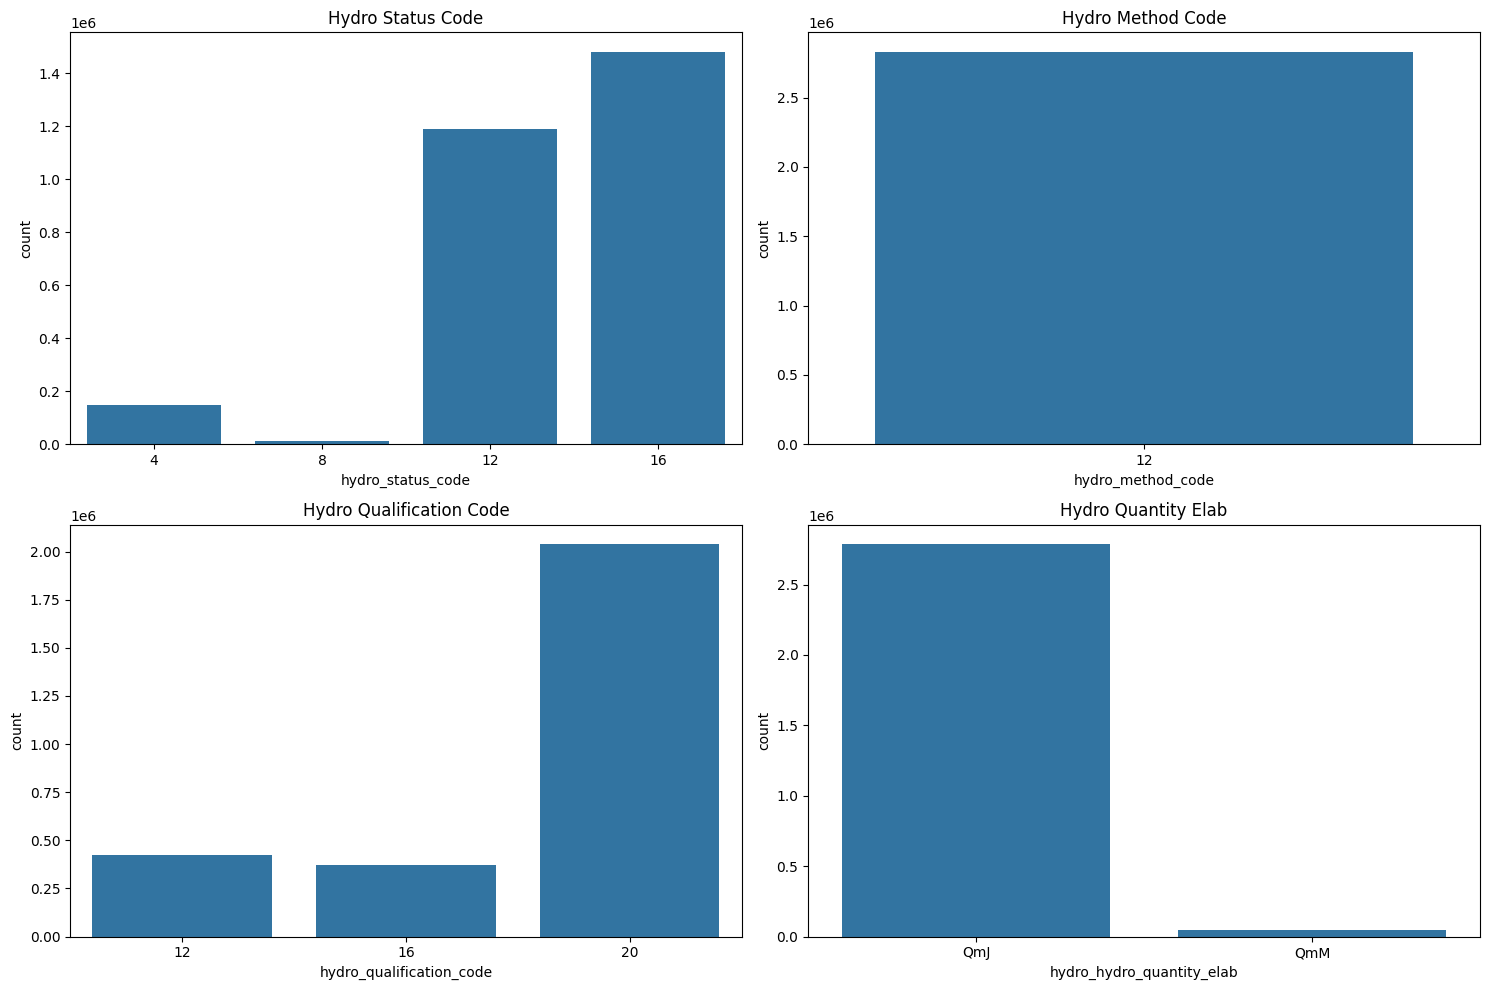

In [18]:
# Create a bar plot for hydro_status_code, hydro_method_code, hydro_qualification_code, and hydro_hydro_quantity_elab
plt.figure(figsize=(15, 10))

# Plot hydro_status_code
plt.subplot(2, 2, 1)
sns.countplot(data=hydro, x='hydro_status_code')
plt.title('Hydro Status Code')

# Plot hydro_method_code
plt.subplot(2, 2, 2)
sns.countplot(data=hydro, x='hydro_method_code')
plt.title('Hydro Method Code')

# Plot hydro_qualification_code
plt.subplot(2, 2, 3)
sns.countplot(data=hydro, x='hydro_qualification_code')
plt.title('Hydro Qualification Code')

# Plot hydro_hydro_quantity_elab
plt.subplot(2, 2, 4)
sns.countplot(data=hydro, x='hydro_hydro_quantity_elab')
plt.title('Hydro Quantity Elab')

plt.tight_layout()
plt.show()



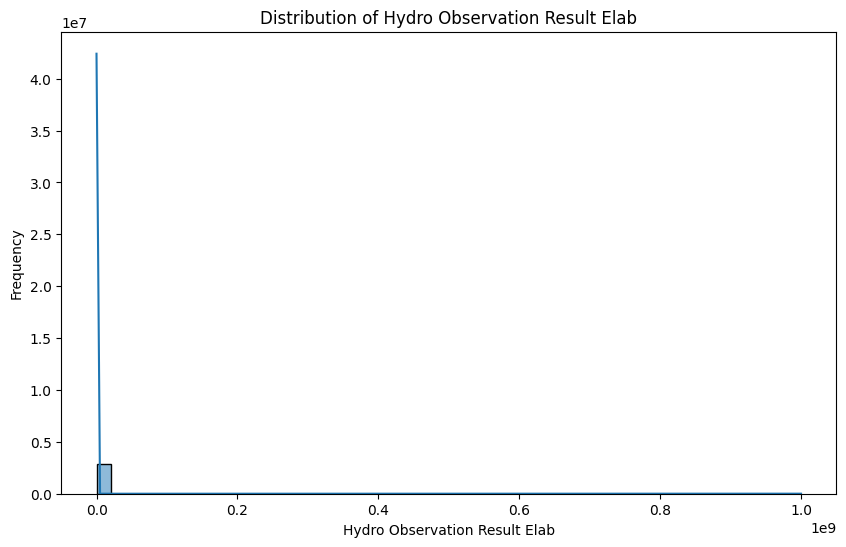

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(hydro['hydro_observation_result_elab'], bins=50, kde=True)
plt.title('Distribution of Hydro Observation Result Elab')
plt.xlabel('Hydro Observation Result Elab')
plt.ylabel('Frequency')
plt.show()



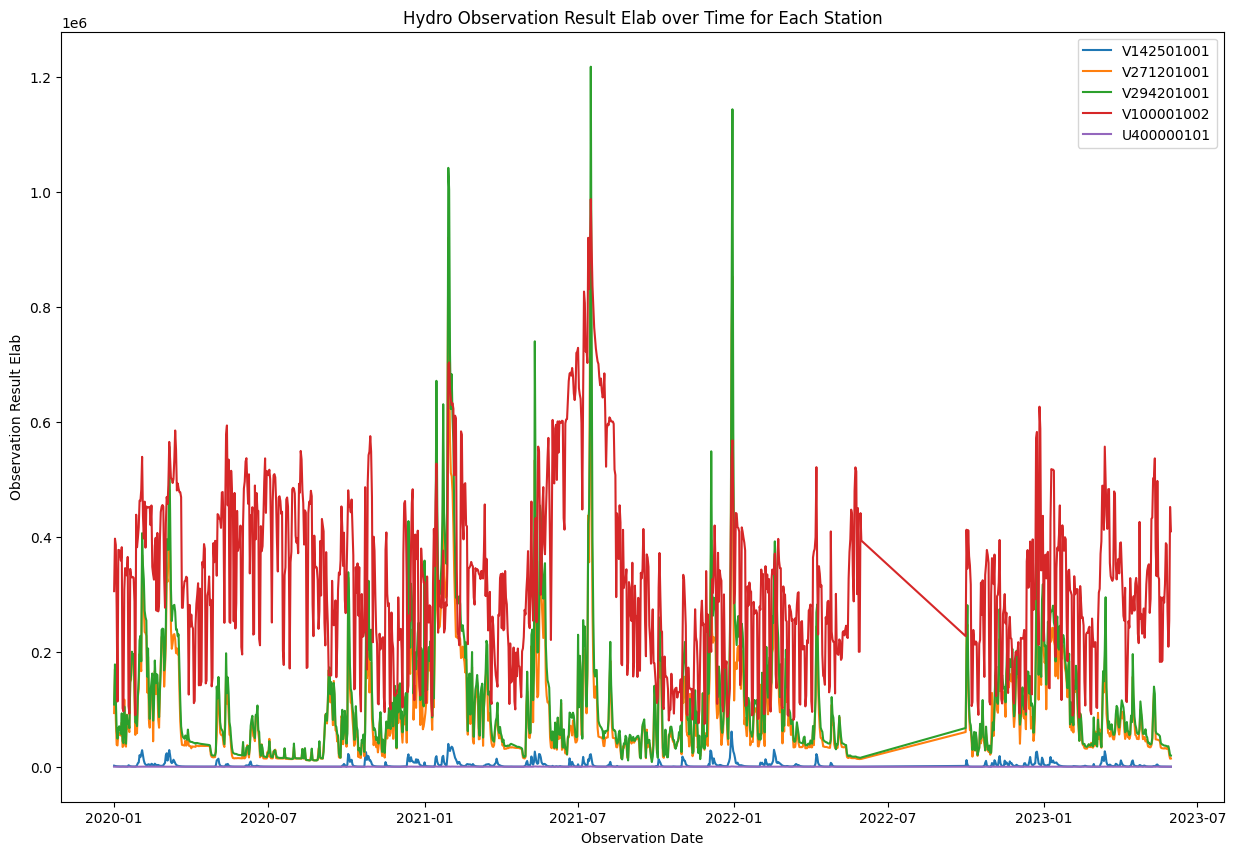

In [20]:
plt.figure(figsize=(15, 10))

for station_code in hydro['hydro_station_code'].unique()[0:5]:
    station_data = hydro[hydro['hydro_station_code'] == station_code]
    plt.plot(station_data['hydro_observation_date_elab'], station_data['hydro_observation_result_elab'], label=station_code)

plt.xlabel('Observation Date')
plt.ylabel('Observation Result Elab')
plt.title('Hydro Observation Result Elab over Time for Each Station')
plt.legend(loc='upper right')
plt.show()

In [ ]:
filtered_data = hydro[(hydro['hydro_observation_date_elab'] >= '2022-01-01') & (hydro['hydro_observation_date_elab'] <= '2023-12-31')]

plt.figure(figsize=(15, 10))

for station_code in filtered_data['hydro_station_code'].unique():
    station_data = filtered_data[filtered_data['hydro_station_code'] == station_code]
    plt.plot(station_data['hydro_observation_date_elab'], station_data['hydro_observation_result_elab'], label=station_code)

plt.xlabel('Observation Date')
plt.ylabel('Observation Result Elab')
plt.title('Hydro Observation Result Elab over Time for Each Station (2022-2023)')
plt.legend(loc='upper right')
plt.show()

In [22]:
hydro_simple = hydro[['hydro_station_code', 'hydro_observation_date_elab', 'hydro_observation_result_elab']]
print(hydro_simple.head())

  hydro_station_code hydro_observation_date_elab  \
0         V142501001                  2020-01-01   
1         V271201001                  2020-01-01   
2         V294201001                  2020-01-01   
3         V100001002                  2020-01-01   
4         U400000101                  2020-01-01   

   hydro_observation_result_elab  
0                         1833.0  
1                        93389.0  
2                       108237.0  
3                       305464.0  
4                           85.0  


In [ ]:
unique_station_codes = hydro_simple['hydro_station_code'].unique()

for station_code in unique_station_codes:
    station_data = hydro_simple[hydro_simple['hydro_station_code'] == station_code]
    plt.figure(figsize=(10, 6))
    plt.plot(station_data['hydro_observation_date_elab'], station_data['hydro_observation_result_elab'],'o')
    plt.title(f'Hydro Observation Result Elab over Time for Station {station_code}')
    plt.xlabel('Observation Date')
    plt.ylabel('Observation Result Elab')
    plt.show()
    


In [24]:
unique_station_codes = hydro_simple['hydro_station_code'].unique()

for station_code in unique_station_codes:
    station_data=[]
    station_data.append(hydro_simple[hydro_simple['hydro_station_code'] == station_code])
       
    

hydro_station_code               0
hydro_observation_date_elab      0
hydro_observation_result_elab    0
hydro_status_code                0
hydro_method_code                0
hydro_qualification_code         0
hydro_longitude                  0
hydro_latitude                   0
hydro_hydro_quantity_elab        0
dtype: int64